# The Effect of Nathan Chen on World Championship Scores

Figure Skating is the competitive sport of ice skating, for men's offical competitions it is divided into two parts: short program and free skate or long program. World Figure Skating Championships is an annual figure skating competiton that is held by the International Skating Union (ISU). This project will consist of analyzing Nathan Chen's impact on the sport, especially the increase of scores due to the increase of quads in both programs. 

# Data Scraping
I gathered my data of World Championship Men's Figure Skating Competition from the ISU results site which are the official scores reported by the ISU. 

In [154]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
#World Figure Skating Championship Final Free Skate 2016
r2016 = requests.get('http://www.isuresults.com/results/season1516/wc2016/SEG002.HTM')
text = BeautifulSoup(r2016.content, 'html.parser')
table = text.find("table")
long2016 = pd.read_html(str(table))[2]
long2016.columns = ['place', 'name', 'nation', 'TSS', 'TES', 'filler','PCS', 'SS', 'TR', 'PE', 'CO', 'IN', 'ded', 'STN']
long2016 = long2016.drop(columns=['filler'])
long2016['year'] = 2016

In [171]:
#World Figure Skating Championship Final Free Skate 2017
r2017 = requests.get('http://www.isuresults.com/results/season1617/wc2017/SEG002.HTM')
text = BeautifulSoup(r2017.content, 'html.parser')
table = text.find("table")
long2017 = pd.read_html(str(table))[2]
long2017.columns = ['place', 'name', 'nation', 'TSS', 'TES', 'filler','PCS', 'SS', 'TR', 'PE', 'CO', 'IN', 'ded', 'STN']
long2017 = long2017.drop(columns=['filler'])
long2017['year'] = 2017

In [172]:
#World Figure Skating Championship Final Free Skate 2018
r2018 = requests.get('http://www.isuresults.com/results/season1718/wc2018/SEG002.HTM')
text = BeautifulSoup(r2018.content, 'html.parser')
table = text.find("table")
long2018 = pd.read_html(str(table))[2]
long2018.columns = ['place', 'name', 'nation', 'TSS', 'TES', 'filler','PCS', 'SS', 'TR', 'PE', 'CO', 'IN', 'ded', 'STN']
long2018 = long2018.drop(columns=['filler'])
long2018['year'] = 2018
#print(long2018)

In [173]:
#World Figure Skating Championship Final Free Skate 2019
r2019 = requests.get('http://www.isuresults.com/results/season1819/wc2019/data0105.htm')
text = BeautifulSoup(r2019.content, 'html.parser')
table = text.find("table")
long2019 = pd.read_html(str(table))[0]
long2019.columns = ['place', 'name', 'nation', 'TSS', 'TES','PCS', 'SS', 'TR', 'PE', 'CO', 'IN', 'ded', 'STN']
long2019['year'] = 2019
long2019 = long2019.iloc[1: , :]
#print(long2019)

In [174]:
frames = [long2016 ,long2018, long2019, long2017]
result = pd.concat(frames, ignore_index=True,).reset_index()
result['TSS'] = result['TSS'].astype(float, errors = 'raise')

<AxesSubplot:title={'center':'TSS'}, xlabel='nation'>

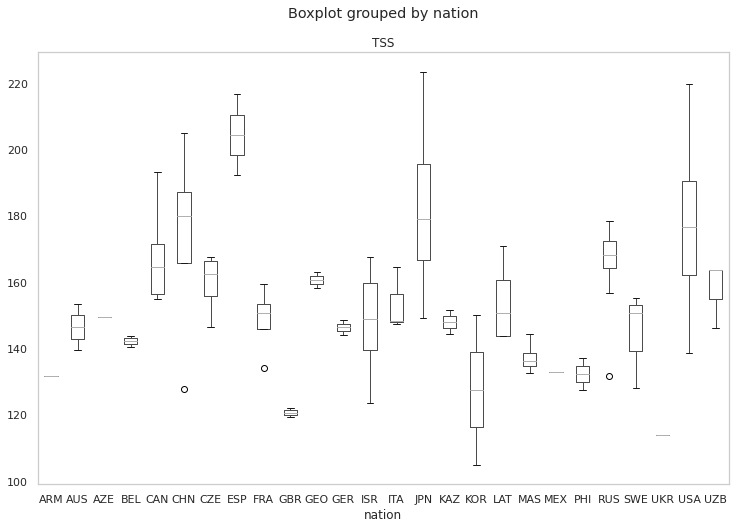

In [175]:
nations = result.groupby(['nation'], as_index=False)['TSS'].mean()
result.boxplot(by ='nation', column =['TSS'], grid = False)

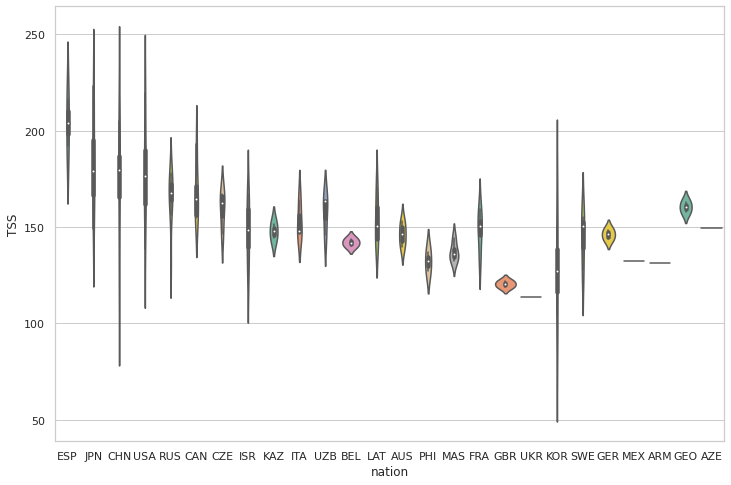

In [176]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='nation',y="TSS",palette="Set2", data=result)